In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statistics
from collections import Counter

In [2]:
pollen_X, pollen_y = fetch_openml(name='pollen', return_X_y=True)
X = pd.DataFrame(pollen_X).to_numpy()
y = pd.DataFrame(pollen_y).to_numpy()
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
for i in range(X.shape[1]): # for each feature
    print(f"the variance of the {i} feature is: {statistics.variance(X[:,i])}") 
    print(f"the range of the {i} feature is from: {min(X[:,i])} to: {max(X[:,i])}")
    print(f"the mean of the {i} feature is: {statistics.mean(X[:,i])}")
    print(f"the median of the {i} feature is: {statistics.median(X[:,i])}")



c:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name pollen exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of features: 4
Number of samples: 3848
Number of classes: 3784
the variance of the 0 feature is: 40.93743104167752
the range of the 0 feature is from: -23.2839 to: 21.4066
the mean of the 0 feature is: -0.0036366424116424205
the median of the 0 feature is: -0.16385
the variance of the 1 feature is: 26.897817148344263
the range of the 1 feature is from: -16.3935 to: 17.2583
the mean of the 1 feature is: 0.000159667359667356
the median of the 1 feature is: -0.23170000000000002
the variance of the 2 feature is: 62.01875668272487
the range of the 2 feature is from: -31.413 to: 30.3178
the mean of the 2 feature is: 0.0031031185031185076
the median of the 2 feature is: -0.056150000000000005
the variance of the 3 feature is: 100.86368990998515
the range of the 3 feature is from: -34.0352 to: 35.8028
the mean of the 3 feature is: 0.004237032224532223
the median of the 3 feature is: -0.14934999999999998


In [3]:
def evaluate_MSE(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [4]:
def plot_accuracy(r, accuracy, str):
    # r = x axis
    # accuracy = y axis
    plt.plot(r, accuracy)
    plt.xlabel('ratio of test set size')
    plt.ylabel('MSE')
    plt.title(str)
    plt.show()

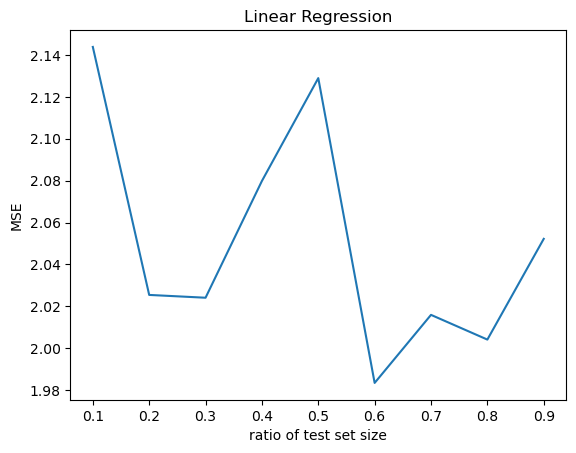

In [5]:
def linearRegression__diff_ratios(X ,y, str):
    acc = []
    rs = [r for r in np.arange(0.1, 1, 0.1)]
    for r in rs:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r)
        lr = LinearRegression()
        accuracy = evaluate_MSE(X_train, X_test, y_train, y_test, lr)
        acc.append(accuracy)
    plot_accuracy(rs, acc, str)
    
linearRegression__diff_ratios(X, y, 'Linear Regression')

In [6]:
from itertools import combinations
def k_best_features_selection(train_set, test_set, k):
    return k_features_selection(train_set[0], test_set[0], train_set[1], test_set[1], k)

def k_features_selection(X_train, X_test, y_train, y_test, k):
    lowest_MSE = float('inf')  
    best_features = None
    clf = LinearRegression()
    all_possible_group_of_features = combinations(range(X_train.shape[1]), k)
    for features in all_possible_group_of_features:
        # select the k features from the train-set and the test-set
        k_train_X = X_train[:, features]
        k_test_X = X_test[:, features]
        MSE = evaluate_MSE(k_train_X, k_test_X, y_train, y_test, clf)
        if MSE < lowest_MSE: # update the best accuracy and the best features
            best_features = features    
            lowest_MSE = MSE
    return best_features, lowest_MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
best_features2, MSE2 = k_best_features_selection([X_train, y_train], [X_test, y_test], 2)
best_features3, MSE3 = k_best_features_selection([X_train, y_train], [X_test, y_test], 3)
print(f"for k = 2, the best features are: {best_features2} and the MSE is: {MSE2}")
print(f"for k = 3, the best features are: {best_features3} and the MSE is: {MSE3}")

for k = 2, the best features are: (0, 3) and the MSE is: 3.1064985179632094
for k = 3, the best features are: (0, 1, 3) and the MSE is: 2.0223219804787314
